In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/Users/marcantoinelementec/code/marcan-dev/cyclistic_bike_share_2023


In [3]:
directory = '/Users/marcantoinelementec/code/marcan-dev/cyclistic_bike_share_2023/data'

In [4]:
csv_files = os.listdir(directory)

In [5]:
csv_files

['202208-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202304_divvy_tripdata.csv',
 '202303-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202210-divvy-tripdata.csv',
 '202212-divvy-tripdata.csv',
 '202211-divvy-tripdata.csv',
 '202302-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202209-divvy-publictripdata.csv',
 '202301-divvy-tripdata.csv']

In [6]:
csv_files[0][0:6]

'202208'

In [7]:
name_csv = [csv_files[i][0:6] for i in range(len(csv_files))]


In [8]:
name_csv

['202208',
 '202205',
 '202304',
 '202303',
 '202206',
 '202210',
 '202212',
 '202211',
 '202302',
 '202207',
 '202209',
 '202301']

In [9]:
data_202205 = pd.read_csv('data/202205-divvy-tripdata.csv') 
data_202206 = pd.read_csv('data/202206-divvy-tripdata.csv') 
data_202207 = pd.read_csv('data/202207-divvy-tripdata.csv') 
data_202208 = pd.read_csv('data/202208-divvy-tripdata.csv') 
data_202209 = pd.read_csv('data/202209-divvy-publictripdata.csv') 
data_202210 = pd.read_csv('data/202210-divvy-tripdata.csv') 
data_202211 = pd.read_csv('data/202211-divvy-tripdata.csv') 
data_202212 = pd.read_csv('data/202212-divvy-tripdata.csv') 
data_202301 = pd.read_csv('data/202301-divvy-tripdata.csv') 
data_202302 = pd.read_csv('data/202302-divvy-tripdata.csv') 
data_202303 = pd.read_csv('data/202303-divvy-tripdata.csv') 
data_202304 = pd.read_csv('data/202304_divvy_tripdata.csv') 

In [10]:
list_data = [data_202205,data_202206,data_202207,data_202208,data_202209,data_202210,data_202211,\
            data_202212,data_202301,data_202302,data_202303,data_202304]

In [11]:
df = pd.concat(list_data)

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [13]:
df.shape

(5859061, 13)

In [14]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859061 entries, 0 to 426589
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 625.8+ MB


In [16]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859061 entries, 0 to 426589
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 625.8+ MB


In [18]:
# duration of rides

In [19]:
df['duration'] = df['ended_at']-df['started_at']

In [20]:
df['duration_hour'] = df['duration'].apply(lambda x: x.total_seconds() / 3600)

In [21]:
df.drop(columns = 'duration', axis=1,inplace=True)


In [22]:
df=df[df['duration_hour']>0]

In [23]:
df.groupby('member_casual')['duration_hour'].mean()


member_casual
casual    0.474952
member    0.208353
Name: duration_hour, dtype: float64

En moyenne les utilisateurs "casual" font des rides plus long que les utilisateur "member" 

In [24]:
data_duration = {
    'member_casual': ['casual', 'member'],
    'duration': [0.474888, 0.208281]
}

df_duration = pd.DataFrame(data_duration)

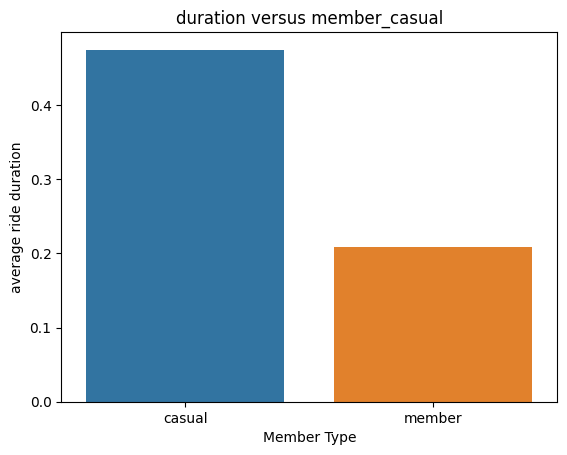

In [25]:
plt.title('duration versus member_casual')
sns.barplot(data=df_duration, x='member_casual', y='duration');
plt.xlabel('Member Type')
plt.ylabel('average ride duration')

# Display the plot
plt.show()

In [26]:
number_casual = df.groupby('member_casual')['ride_id'].count()['casual']
number_member = df.groupby('member_casual')['ride_id'].count()['member']

In [27]:
casual_vs_member = {
    'member_casual': ['casual', 'member'],
    'ride_id': [2358307, 3500754]
}

casual_vs_member = pd.DataFrame(casual_vs_member)



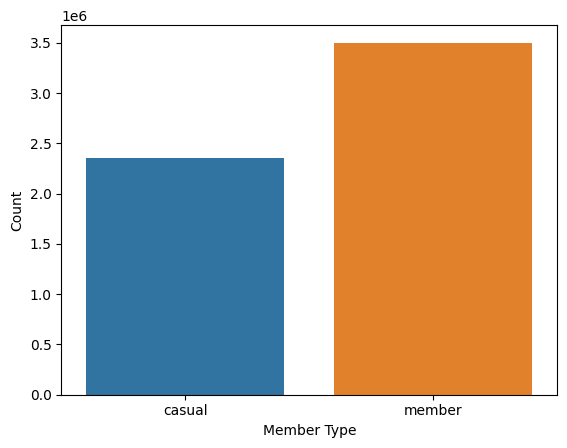

In [28]:
sns.barplot(data=casual_vs_member, x='member_casual', y='ride_id');
plt.xlabel('Member Type')
plt.ylabel('Count')

# Display the plot
plt.show()

In [29]:
print(f'Il y a {number_casual} utilisateurs "casual" contre {number_member} utilisateurs "member"')

Il y a 2358048 utilisateurs "casual" contre 3500469 utilisateurs "member"


In [30]:
# distance of rides

In [31]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Calculate the differences between the latitudes and longitudes
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

In [32]:
df['distance_km'] = df.apply(lambda row: calculate_distance(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

In [33]:
df.distance_km.mean()

2.117265856896826

In [34]:
df.groupby('member_casual')['distance_km'].mean()

member_casual
casual    2.146530
member    2.097592
Name: distance_km, dtype: float64

<AxesSubplot:xlabel='member_casual', ylabel='duration_hour'>

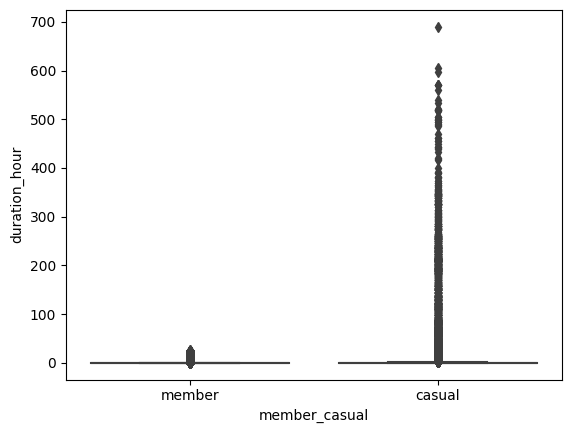

In [35]:
sns.boxplot(data=df, x='member_casual', y='duration_hour')

<AxesSubplot:xlabel='duration_hour'>

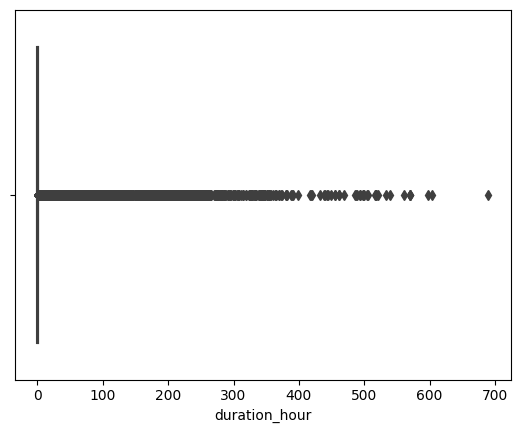

In [36]:
sns.boxplot(data=df, x='duration_hour')

In [37]:
duration_hour_inf_2hour = df[df['duration_hour']<2]

In [38]:
df.shape

(5858517, 15)

In [39]:
duration_hour_inf_2hour.shape

(5813984, 15)

In [40]:
print(f'{round((duration_hour_inf_2hour.shape[0]/df.shape[0])*100,2)}% \
of rides are below 2 hours of durations')

99.24% of rides are below 2 hours of durations


In [41]:
# we focus of rides below 2 hours

In [42]:
duration_hour_inf_2hour.groupby('member_casual')['duration_hour'].mean()

member_casual
casual    0.305529
member    0.194789
Name: duration_hour, dtype: float64

In [43]:
duration_hour_inf_2hour[duration_hour_inf_2hour['member_casual'] == 'member'].duration_hour

0         0.555833
1         0.631667
2         0.363889
3         0.145000
4         0.083611
            ...   
426580    0.522222
426581    0.388889
426582    0.480556
426583    0.444167
426584    0.055833
Name: duration_hour, Length: 3493343, dtype: float64

In [44]:
df_final = duration_hour_inf_2hour[duration_hour_inf_2hour.distance_km<20]

In [45]:
print(f'{round((duration_hour_inf_2hour[duration_hour_inf_2hour.distance_km<20].shape[0]/df.shape[0])*100,2)}% \
of rides are below 20km and below 2 hours')

99.23% of rides are below 20km and below 2 hours


In [46]:
df_final.to_csv('df_final.csv', index=False)

In [47]:
member_casual_distance = df_final.groupby('member_casual')['distance_km'].mean().reset_index()

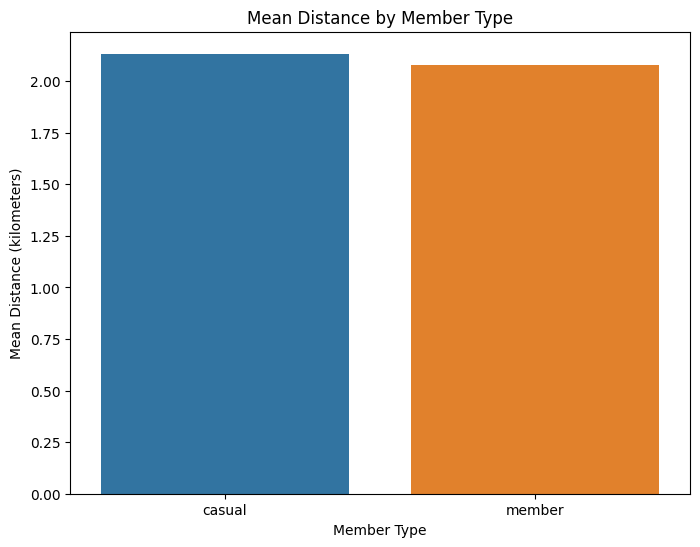

In [48]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=member_casual_distance, x='member_casual', y='distance_km')

# Adding labels and title
plt.xlabel('Member Type')
plt.ylabel('Mean Distance (kilometers)')
plt.title('Mean Distance by Member Type')

# Display the plot
plt.show()

Malgrès une durée d'utilisation très différente, les distances de trajet sont sensiblement les même

Pour les 2 catégories d'utilisateur, il y a plus de distance parcourue entre avril et septembre

La durée des trajets est aussi plus longue pour les mois compris entre avril et septembre

In [49]:
#import folium
#from folium import plugins
#from folium.plugins import MarkerCluster

# Create a base map centered at an arbitrary location
#m = folium.Map(location=[41.881832, -87.623177], zoom_start=12)

# Create a marker cluster group for start coordinates
#start_cluster = MarkerCluster(name='Start Coordinates').add_to(m)

# Create a marker cluster group for end coordinates
#end_cluster = MarkerCluster(name='End Coordinates').add_to(m)

# Iterate through your DataFrame and add markers to the clusters
#for index, row in df_final.iterrows():
#    start_marker = folium.Marker([row['start_lat'], row['start_lng']], icon=folium.Icon(color='green'))
#    start_marker.add_to(start_cluster)
    
#    end_marker = folium.Marker([row['end_lat'], row['end_lng']], icon=folium.Icon(color='red'))
#    end_marker.add_to(end_cluster)

# Add layer control to toggle between clusters
#folium.LayerControl(collapsed=False).add_to(m)

# Display the map
#m.save('map_with_markers.html')
